# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nasywa Azzah Nabila
- **Email:** nasywaazzahnabila@gmail.com
- **ID Dicoding:** nasywa_azzah_nabila

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa bisnis penyewaan sepeda selama beberapa tahun terakhir?
2. Apakah kondisi cuaca dan musim mempengaruhi jumlah penyewaan sepeda?
3. Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
4. Apakah terdapat pola berdasarkan waktu (jam, hari, dan bulan) yang dapat mempengaruhi jumlah penyewaan sepeda?
5. Seberapa besar perbandingan antara jumlah penyewa yang memilih opsi registered dibandingkan dengan casual?

## Import Semua Packages/Library yang Digunakan

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [111]:
df_day = pd.read_csv("C:/Users/HP/Downloads/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [113]:
df_hour = pd.read_csv("C:/Users/HP/Downloads/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### A. Menilai Tabel `df_day`

In [117]:
# Memberikan informasi ringkas
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- `df_day` memiliki jumlah data sebanyak 731 baris dan 16 kolom
- `df_day` memiliki 4 kolom dengan tipe data float, 11 kolom dengan tipe data integer, dan 1 kolom dengan tipe data object

In [120]:
# Memeriksa nilai unik setiap kolom
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

**Insight:**
`df_day` memiliki nilai unik pada setiap kolom

In [123]:
# Memeriksa missing values
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
Berdasarkan output di atas, dapat diketahui bahwa `df_day` tidak memiliki missing values pada setiap kolomnya

In [126]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
Berdasarkan output di atas, dapat diketahui bahwa `df_day` tidak memiliki data duplikat atau nilai yang sama pada setiap kolomnya

#### B. Menilai Tabel `df_hour`

In [130]:
# Memberikan informasi ringkas
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- `df_hour` memiliki jumlah data sebanyak 17379 baris dan 17 kolom
- `df_hour` memiliki 4 kolom dengan tipe data float, 12 kolom dengan tipe data integer, dan 1 kolom dengan tipe data object

In [133]:
# Memeriksa nilai unik setiap kolom
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

**Insight:**
`df_hour` memiliki nilai unik pada setiap kolom

In [136]:
# Memeriksa missing values
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
Berdasarkan output di atas, dapat diketahui bahwa `df_hour` tidak memiliki missing values pada setiap kolomnya

In [139]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
Berdasarkan output di atas, dapat diketahui bahwa `df_hour` tidak memiliki data duplikat atau nilai yang sama pada setiap kolomnya

### Cleaning Data

#### A. Membersihkan Tabel `df_day`

In [144]:
# Menghapus kolom instant
df_day.drop(['instant'], axis = 1, inplace = True)
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [146]:
# Mengubah nama kolom
df_day.rename(columns = {'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'workingday':'type_of_day',
                         'weathersit':'weather_situation', 'temp':'temperature', 'atemp':'ambient_temperature', 
                         'hum':'humidity', 'windspeed':'wind_speed', 'cnt':'count_customer'}, inplace = True)
df_day.head()

,date,season,year,month,holiday,day,type_of_day,weather_situation,temperature,ambient_temperature,humidity,wind_speed,casual,registered,count_customer
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Tujuan:**
Mempermudah untuk memahami nama kolom

In [149]:
# Mengubah tipe data
df_day['season'] = df_day.season.astype('category')
df_day['year'] = df_day.year.astype('category')
df_day['month'] = df_day.month.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['day'] = df_day.day.astype('category')
df_day['type_of_day'] = df_day.type_of_day.astype('category')
df_day['weather_situation'] = df_day.weather_situation.astype('category')
df_day['date'] = pd.to_datetime(df_day['date'])
df_day.head()

,date,season,year,month,holiday,day,type_of_day,weather_situation,temperature,ambient_temperature,humidity,wind_speed,casual,registered,count_customer
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Mengubah tipe data numerik menjadi kategorikal
- Mengubah tipe data object menjadi datetime

In [152]:
# Mengonversi isi kolom
df_day.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
df_day.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace = True)
df_day.weather_situation.replace((1, 2, 3, 4), ('Clear', 'Misty Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'), inplace = True)
df_day.day.replace((0, 1, 2, 3, 4, 5, 6), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace = True)
df_day.year.replace((0, 1), ('2011', '2012'), inplace = True)
df_day.type_of_day.replace((0, 1), ('Weekend', 'Weekday'), inplace = True)
df_day.head()

,date,season,year,month,holiday,day,type_of_day,weather_situation,temperature,ambient_temperature,humidity,wind_speed,casual,registered,count_customer
0,2011-01-01,Spring,2011,Jan,0,Saturday,Weekend,Misty Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,Weekend,Misty Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,Weekday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,Weekday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,Weekday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Tujuan:**
Mempermudah untuk memahami hasil analisis nantinya

#### B. Membersihkan Tabel `df_hour`

In [156]:
# Menghapus kolom instant
df_hour.drop(['instant'], axis = 1, inplace = True)
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [157]:
# Mengubah nama kolom
df_hour.rename(columns = {'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day', 'workingday':'type_of_day',
                         'weathersit':'weather_situation', 'temp':'temperature', 'atemp':'ambient_temperature', 
                         'hum':'humidity', 'windspeed':'wind_speed', 'cnt':'count_customer'}, inplace = True)
df_hour.head()

,date,season,year,month,hour,holiday,day,type_of_day,weather_situation,temperature,ambient_temperature,humidity,wind_speed,casual,registered,count_customer
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Tujuan:**
Mempermudah untuk memahami nama kolom

In [161]:
# Mengubah tipe data
df_hour['season'] = df_hour.season.astype('category')
df_hour['year'] = df_hour.year.astype('category')
df_hour['month'] = df_hour.month.astype('category')
df_hour['holiday'] = df_hour.holiday.astype('category')
df_hour['day'] = df_hour.day.astype('category')
df_hour['type_of_day'] = df_hour.type_of_day.astype('category')
df_hour['weather_situation'] = df_hour.weather_situation.astype('category')
df_hour['date'] = pd.to_datetime(df_hour['date'])
df_hour.head()

,date,season,year,month,hour,holiday,day,type_of_day,weather_situation,temperature,ambient_temperature,humidity,wind_speed,casual,registered,count_customer
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengubah tipe data numerik menjadi kategorikal
- Mengubah tipe data object menjadi datetime

In [164]:
# Mengonversi isi kolom
df_hour.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
df_hour.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace = True)
df_hour.weather_situation.replace((1, 2, 3, 4), ('Clear', 'Misty Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'), inplace = True)
df_hour.day.replace((0, 1, 2, 3, 4, 5, 6), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace = True)
df_hour.year.replace((0, 1), ('2011', '2012'), inplace = True)
df_hour.type_of_day.replace((0, 1), ('Weekend', 'Weekday'), inplace = True)
df_hour.head()

,date,season,year,month,hour,holiday,day,type_of_day,weather_situation,temperature,ambient_temperature,humidity,wind_speed,casual,registered,count_customer
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Tujuan:**
Mempermudah untuk memahami hasil analisis nantinya

## Exploratory Data Analysis (EDA)

### Explore `df_day`

In [169]:
# Memeriksa parameter statistik
df_day.describe()

,temperature,ambient_temperature,humidity,wind_speed,casual,registered,count_customer
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Rata-rata jumlah penyewaan sepeda harian sekitar 4504 dengan standar deviasi sekitar 1937 menunjukkan adanya variasi yang cukup signifikan dalam jumlah penyewaan.
- Penyewa casual memiliki rata-rata jumlah penyewaan sekitar 848, sedangkan penyewa registered memiliki rata-rata yang jauh lebih tinggi sekitar 3656. Hal ini menunjukkan bahwa penyewa registered adalah pengguna utama layanan ini.

In [172]:
# Mengelompokkan jumlah customer berdasarkan tahun
df_day.groupby(by = 'year').agg({'registered': ['sum'], 'casual': ['sum'], 'count_customer': ['sum']})

,registered,casual,count_customer
,sum,sum,sum
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


**Insight:**
Pada tahun 2012, jumlah penyewaan sepeda secara keseluruhan telah meningkat hampir dua kali lipat dari tahun sebelumnya. Hal ini menunjukkan bahwa bisnis penyewaan sepeda ini mengalami peningkatan yang cukup signifikan. 

In [175]:
# Mengelompokkan jumlah customer antara hari kerja dan hari libur
df_day.groupby(by = "type_of_day").agg({"count_customer": ["sum"]})

,count_customer
,sum
type_of_day,
Weekend,1000269
Weekday,2292410


**Insight:**
Berdasarkan output di atas, dapat diketahui bahwa jumlah penyewaan sepeda tertinggi terjadi pada hari kerja, yaitu dengan total sebanyak 2.292.410 penyewa.

In [178]:
# Mengelompokkan jumlah customer berdasarkan hari
df_day.groupby(by = "day").agg({"count_customer": ["sum"]})

,count_customer
,sum
day,
Sunday,444027
Monday,455503
Tuesday,469109
Wednesday,473048
Thursday,485395
Friday,487790
Saturday,477807


**Insight:**
Berdasarkan output di atas, dapat diketahui bahwa jumlah penyewaan sepeda tertinggi (sebanyak 487.790 penyewa) terjadi pada hari Jumat, sedangkan jumlah penyewaan sepeda terendah (sebanyak 444.027 penyewa) terjadi pada hari Minggu.

In [181]:
# Mengelompokkan jumlah customer berdasarkan musim
df_day.groupby(by = "season").agg({"count_customer": ["sum"]})

,count_customer
,sum
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


**Insight:**
Berdasarkan output di atas, dapat diketahui bahwa jumlah penyewaan sepeda tertinggi (sebanyak 1.061.129 penyewa) terjad pada musim gugur, sedangkan jumlah penyewaan sepeda terendah (sebanyak 471.348 penyewa) terjadi pada musim semi.

In [184]:
# Mengelompokkan jumlah customer berdasarkan kondisi cuaca
df_day.groupby(by = "weather_situation").agg({"count_customer": ["sum"]})

,count_customer
,sum
weather_situation,
Clear,2257952
Misty Cloudy,996858
Light Rain/Snow,37869


**Insight:**
Berdasarkan output di atas, dapat diketahui bahwa jumlah penyewaan sepeda tertinggi (sebanyak 2.257.952 penyewa) terjadi ketika cuaca dalam kondisi cerah, sedangkan jumlah penyewaan sepeda terendah (sebanyak 37.869 penyewa) terjadi ketika cuaca dalam kondisi hujan/salju ringan.

### Explore `df_hour`

In [188]:
# Memeriksa parameter statistik
df_hour.describe()

,hour,temperature,ambient_temperature,humidity,wind_speed,casual,registered,count_customer
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Rata-rata jumlah penyewaan sepeda berdasarkan jam adalah sekitar 189 dengan standar deviasi sekitar 181 yang menunjukkan adanya variasi dalam jumlah penyewaan.
- Penyewa casual memiliki rata-rata jumlah penyewaan sekitar 35, sedangkan penyewa registered memiliki rata-rata yang jauh lebih tinggi sekitar 153. Hal ini menunjukkan bahwa penyewa registered adalah pengguna utama layanan ini.

In [191]:
# Mengelompokkan jumlah customer berdasarkan jam operasional
df_hour.groupby(by = "hour").agg({"count_customer": ["sum"]})

,count_customer
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Insight:**
- Tujuan: Mengetahui jam operasional mana yang memberikan kontribusi terbesar terhadap bisnis penyewaan sepeda
- Berdasarkan output di atas, dapat diketahui bahwa jumlah penyewaan sepeda tertinggi (sebanyak 336.860 penyewa) terjadi ketika pukul 17.00 PM, sedangkan jumlah penyewaan sepeda terendah (sebanyak 4.428 penyewa) terjadi ketika pukul 04.00 AM. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa bisnis penyewaan sepeda selama beberapa tahun terakhir?

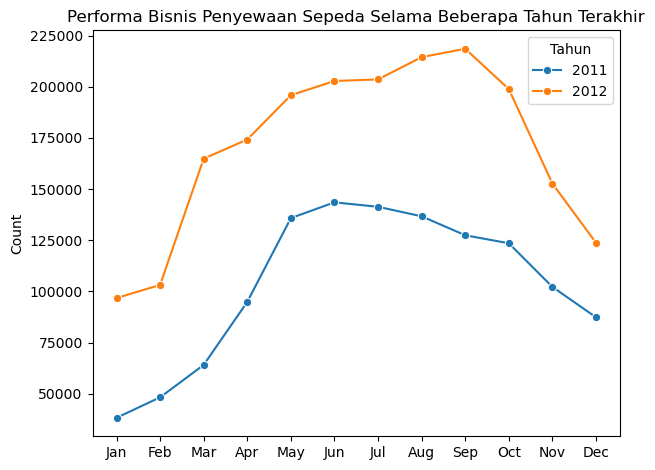

In [196]:
monthly_counts = df_day.groupby(by = ['month', 'year']).agg({'count_customer': 'sum'}).reset_index()
sns.lineplot(data = monthly_counts, x = 'month', y = 'count_customer', hue = 'year', marker = 'o')
plt.title('Performa Bisnis Penyewaan Sepeda Selama Beberapa Tahun Terakhir')
plt.xlabel(None)
plt.ylabel('Count')
plt.legend(title = 'Tahun', loc = 'upper right')
plt.tight_layout()

**Insight:**
- Pada tahun 2012, jumlah penyewaan sepeda secara keseluruhan telah meningkat hampir dua kali lipat dari tahun sebelumnya. Hal ini menunjukkan bahwa bisnis penyewaan sepeda ini mengalami peingkatan yang cukup signifikan.
- Pada tahun 2011 dan 2012, jumlah penyewaan sepeda mengalami penurunan yang serupa pada bulan Oktober hingga Desember.

### Pertanyaan 2: Apakah kondisi cuaca dan musim mempengaruhi jumlah penyewaan sepeda?

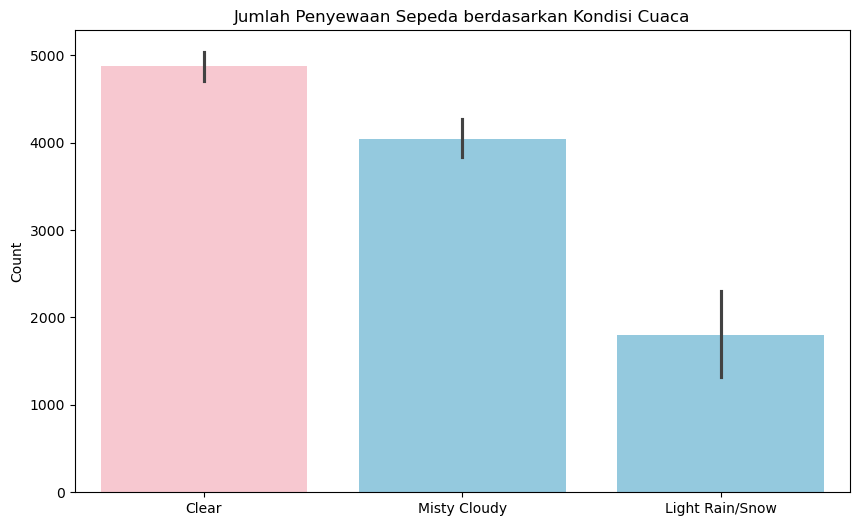

In [101]:
# Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize = (10, 6))
sns.barplot(data = df_day, x = 'weather_situation', y = 'count_customer', hue = 'weather_situation', palette = ['pink', 'skyblue', 'skyblue'])
plt.title('Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel(None)
plt.ylabel('Count')
plt.show()

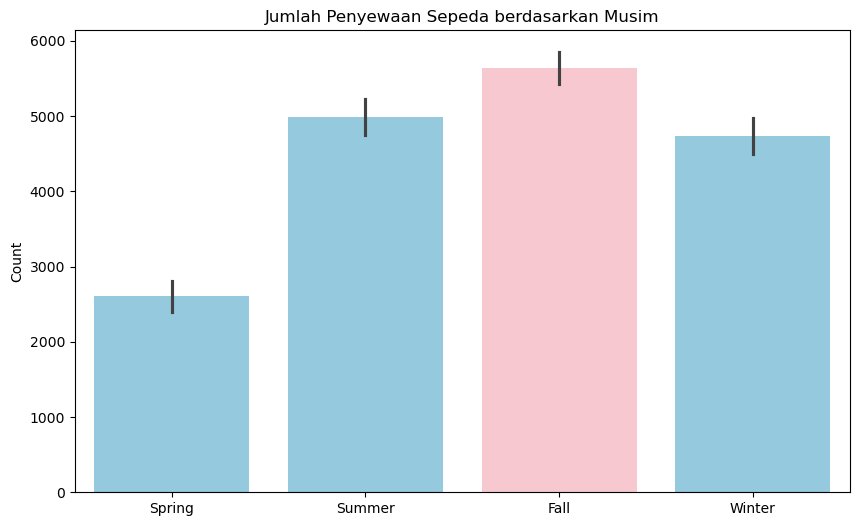

In [103]:
# Pengaruh musim terhadap jumlah penyewaan sepeda
plt.figure(figsize = (10, 6))
sns.barplot(data = df_day, x = 'season', y = 'count_customer', hue = 'season', palette = ['skyblue', 'skyblue', 'pink', 'skyblue'])
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.xlabel(None)
plt.ylabel('Count')
plt.show()

**Insight:**
- Grafik di atas menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi ketika cuaca dalam kondisi cerah, sedangkan jumlah penyewaan sepeda terendah terjadi ketika cuaca dalam kondisi hujan/salju ringan.
- Grafik di atas menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, sedangkan jumlah penyewaan sepeda terendah terjadi pada musim semi.

### Pertanyaan 3: Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

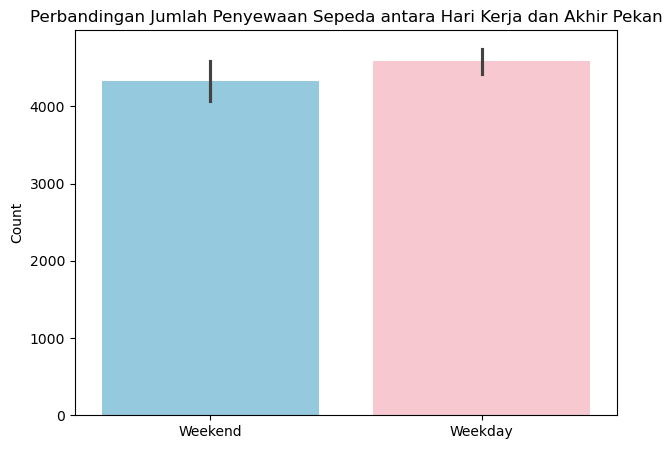

In [433]:
plt.figure(figsize = (7, 5))
sns.barplot(data = df_day, x = 'type_of_day', y = 'count_customer', hue = 'type_of_day', palette = ['skyblue', 'pink'])
plt.title('Perbandingan Jumlah Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel(None)
plt.ylabel('Count')
plt.show()

**Insight:**
Grafik di atas menunjukkan bahwa jumlah penyewaan sepeda pada hari kerja lebih tinggi dibandingkan dengan akhir pekan.

### Pertanyaan 4: Apakah terdapat pola berdasarkan waktu (jam, hari, dan bulan) yang dapat mempengaruhi jumlah penyewaan sepeda?

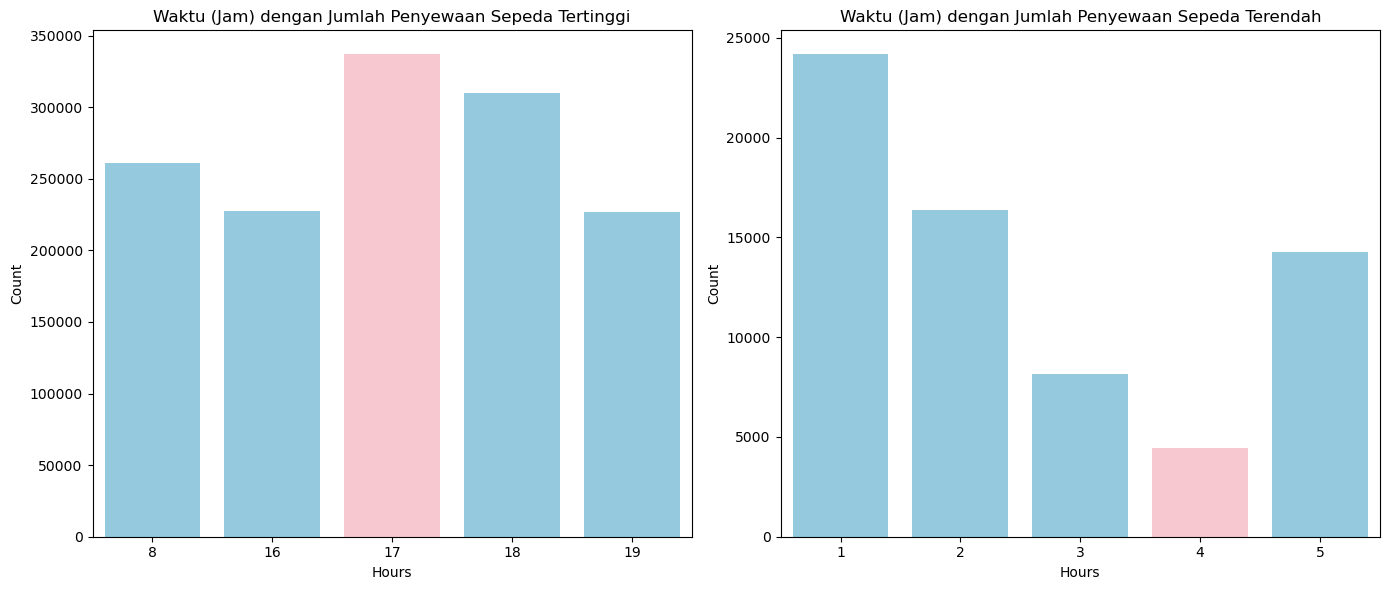

In [436]:
# Perbandingan jumlah penyewaan sepeda berdasarkan jam
top_hours = df_hour.groupby('hour')['count_customer'].sum().sort_values(ascending = False).head(5).reset_index()
bottom_hours = df_hour.groupby('hour')['count_customer'].sum().sort_values(ascending = True).head(5).reset_index()
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.barplot(data = top_hours, x = 'hour', y = 'count_customer', hue = 'hour', palette = ['skyblue', 'skyblue', 'pink', 'skyblue', 'skyblue'], ax = axes[0], legend = False)
axes[0].set_title('Waktu (Jam) dengan Jumlah Penyewaan Sepeda Tertinggi')
axes[0].set_xlabel('Hours')
axes[0].set_ylabel('Count')

sns.barplot(data = bottom_hours, x = 'hour', y = 'count_customer', hue = 'hour', palette = ['skyblue', 'skyblue', 'skyblue', 'pink', 'skyblue'], ax = axes[1], legend = False)
axes[1].set_title('Waktu (Jam) dengan Jumlah Penyewaan Sepeda Terendah')
axes[1].set_xlabel('Hours')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

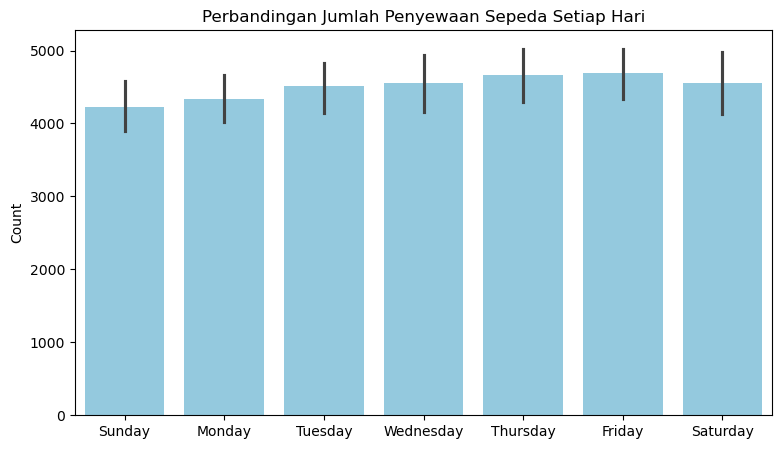

In [437]:
# Perbandingan jumlah penyewaan sepeda setiap hari
plt.figure(figsize = (9, 5))
sns.barplot(data = df_day, x = 'day', y = 'count_customer', color = 'skyblue')
plt.title('Perbandingan Jumlah Penyewaan Sepeda Setiap Hari')
plt.xlabel(None)
plt.ylabel('Count')
plt.show()

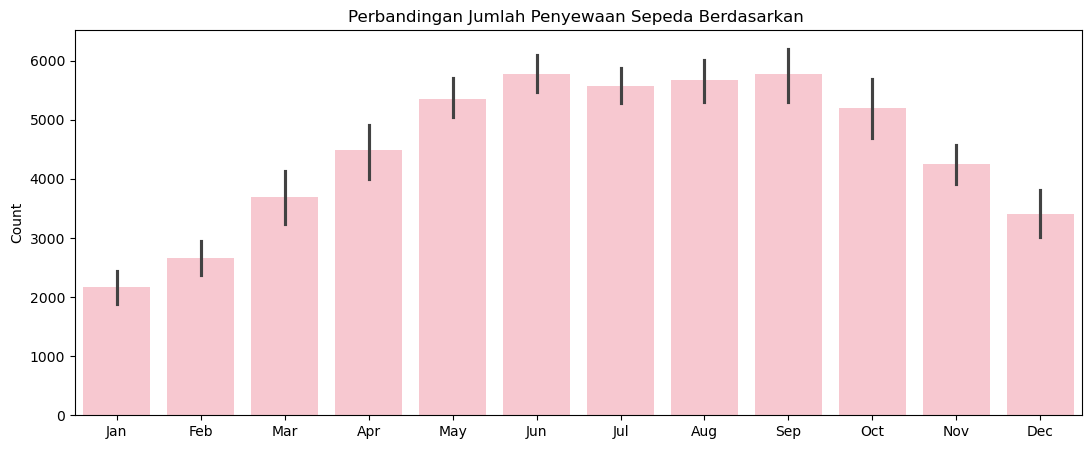

In [438]:
# Perbandingan jumlah penyewaan sepeda berdasarkan bulan
plt.figure(figsize = (13, 5))
sns.barplot(data = df_day, x = 'month', y = 'count_customer', color = 'pink')
plt.title('Perbandingan Jumlah Penyewaan Sepeda Berdasarkan ')
plt.xlabel(None)
plt.ylabel('Count')
plt.show()

**Insight:**
- Berdasarkan jam operasional: Grafik di atas menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi ketika pukul 17.00 PM, sedangkan jumlah penyewaan sepeda terendah terjadi ketika pukul 04.00 AM. 
- Berdasarkan hari: Grafik di atas menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada hari Jumat, sedangkan jumlah penyewaan sepeda terendah terjadi pada hari Minggu. 
- Berdasarkan bulan: Grafik di atas menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada bulan Juni, sedangkan jumlah penyewaan sepeda terendah terjadi pada bulan Januari.

### Pertanyaan 5: Seberapa besar perbandingan antara jumlah penyewa yang memilih opsi registered dibandingkan dengan casual?

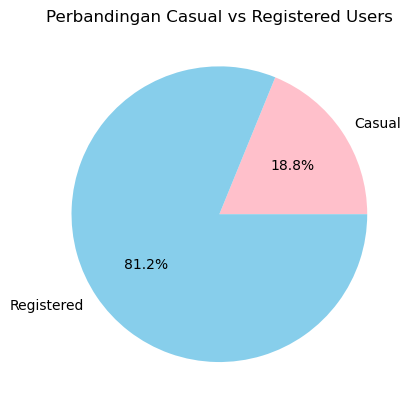

In [447]:
total_casual = sum(df_day['casual'])
total_registered = sum(df_day['registered'])

df = [total_casual, total_registered]
labels = ['Casual', 'Registered']
plt.pie(df, labels = labels, autopct = '%1.1f%%', colors = ['pink', 'skyblue'])
plt.title('Perbandingan Casual vs Registered Users')
plt.show()

**Insight:**
Grafik di atas menunjukkan bahwa mayoritas penyewa memilih opsi registered (sebesar 81,2%) dibandingkan casual (sebesar 18,8%).

## Analisis Lanjutan (Opsional)

### Analisis RFM

In [452]:
current_date = df_hour['date'].max()
rfm = df_hour.groupby(['registered']).agg({'date': lambda x: (current_date - x.max()).days, 'count_customer': 'sum'}).reset_index()
rfm['Frequency'] = df_hour.groupby(['registered'])['count_customer'].count().values
rfm.columns = ['User_Type', 'Recency', 'Monetary', 'Frequency']
rfm.head()

,User_Type,Recency,Monetary,Frequency
0,0,38,35,24
1,1,0,294,201
2,2,1,648,245
3,3,0,1154,294
4,4,3,1602,307


**Insight:**
- Recency: Menghitung jumlah hari sejak penyewaan terakhir.
- Frequency: Menghitung total penyewaan berdasarkan pengguna terdaftar dan kasual.
- Monetary: Menghitung total jumlah penyewaan.

## Conclusion

#### Conclusion Pertanyaan 1: Bagaimana performa bisnis penyewaan sepeda selama beberapa tahun terakhir?
- Bisnis penyewaan sepeda mengalami peningkatan yang cukup signifikan. Hal ini dibuktikan dengan jumlah penyewaan sepeda yang telah meningkat hampir dua kali lipat pada tahun 2012 dibandingkan tahun 2011. Pada tahun 2011 dan tahun 2012, jumlah penyewaan sepeda mengalami penurunan yang serupa pada akhir tahun (bulan Oktober hingga Desember).
  
#### Conclusion Pertanyaan 2: Apakah kondisi cuaca dan musim mempengaruhi jumlah penyewaan sepeda?
- Kondisi cuaca dan musim mempengaruhi jumlah penyewaan sepeda. Hasil analisis menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi ketika cuaca dalam kondisi cerah, diikuti oleh cuaca berawan, dan terakhir cuaca hujan atau bersalju ringan. Selain itu, hasil analisis juga menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, sedangkan jumlah penyewaan sepeda terendah terjadi pada musim semi.
  
#### Conclusion Pertanyaan 3: Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
- Terdapat perbandingan yang cukup signifikan dalam jumlah penyewaan sepeda antara hari kerja dan hari libur. Hasil analisis menunjukkan bahwa jumlah penyewaan sepeda pada hari kerja (sebanyak 2.292.410 penyewa) lebih tinggi dibandingkan dengan akhir pekan (sebanyak 1.000.269 penyewa).

#### Conclusion Pertanyaan 4: Apakah terdapat pola berdasarkan waktu (jam, hari, dan bulan) yang dapat mempengaruhi jumlah penyewaan sepeda?
- Terdapat pola berdasarkan waktu yang dapat mempengaruhi jumlah penyewaan sepeda. Berdasarkan jam operasional, hasil analisis menunjukkan bahwa jumlah penyewaan sepeda paling banyak terjadi ketika pukul 17.00 PM, sedangkan jumlah penyewaan sepeda terendah terjadi ketika pukul 04.00 AM. Berdasarkan hari, hasil analisis menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada hari Jumat, sedangkan jumlah penyewaan sepeda terendah terjadi pada hari Minggu. Berdasarkan bulan, hasil analisis menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi pada bulan Juni, sedangkan jumlah penyewaan sepeda terendah terjadi pada bulan Januari.

#### Conclusion Pertanyaan 5: Seberapa besar perbandingan antara jumlah penyewa yang memilih opsi registered dibandingkan dengan casual?
- Hasil analisis menunjukkan bahwa mayoritas penyewa sepeda memilih opsi registered (sebesar 81,2%) dibandingkan casual (sebesar 18,8%).